# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
new_city = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [26]:
records_counter = 0
set_count = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32edf3f260d3729a4154009b3009b5be"
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if records_counter < 50:
        records_counter += 1
    else:
        set_count += 1
        records_counter = 0

    print('Processing record {} of set {} | {}'.format(records_counter, set_count, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("Could not find city!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')

d not find city!
Processing record 6 of set 9 | ejutla de crespo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32edf3f260d3729a4154009b3009b5be
Processing record 7 of set 9 | saint marys
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32edf3f260d3729a4154009b3009b5be
Processing record 8 of set 9 | kalianget
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32edf3f260d3729a4154009b3009b5be
Processing record 9 of set 9 | la louviere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32edf3f260d3729a4154009b3009b5be
Processing record 10 of set 9 | rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32edf3f260d3729a4154009b3009b5be
Processing record 11 of set 9 | roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32edf3f260d3729a4154009b3009b5be
Processing record 12 of set 9 | lakhdenpokhya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=32edf3f260d37

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [110]:

# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()


City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Temp          566
Lat           566
Lng           566
Wind Speed    566
dtype: int64

In [111]:
weather_data['Temp'] = weather_data['Temp'].replace('', np.nan)
weather_data = weather_data.dropna()
weather_data["Date"]= pd.to_datetime(weather_data['Date'], unit='s', utc=True)
weather_data.head()



,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,vigia,90,BR,2020-04-18 01:58:13+00:00,94,77.00,-0.86,-48.14,1.12
1,punta arenas,14,CL,2020-04-18 01:55:10+00:00,66,48.20,-53.15,-70.92,11.41
2,kodiak,90,US,2020-04-18 01:58:13+00:00,76,51.80,57.79,-152.41,10.29
3,chumikan,97,RU,2020-04-18 01:58:13+00:00,85,29.53,54.72,135.31,5.61
4,rikitea,1,PF,2020-04-18 01:54:40+00:00,63,77.36,-23.12,-134.97,1.99


In [112]:

 

weather_data.to_csv("output_data/cities.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

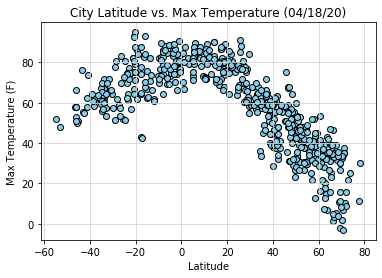

In [117]:

plt.scatter(weather_data["Lat"],weather_data["Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature (04/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

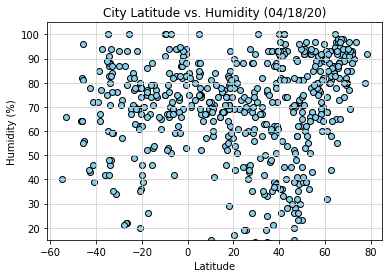

In [118]:
plt.scatter(weather_data["Lat"],weather_data["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (04/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

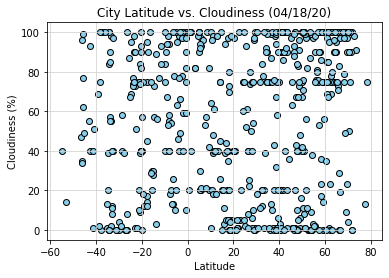

In [119]:

plt.scatter(weather_data["Lat"],weather_data["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (04/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

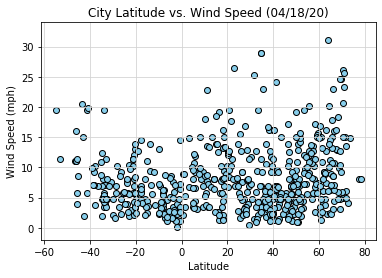

In [120]:

plt.scatter(weather_data["Lat"],weather_data["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (04/18/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("output_data/fig4.png")
plt.show()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [125]:
# Create Northern and Southern Hemisphere DataFrames
# Create Northern and Southern Hemisphere DataFrames
north_df = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) > 0, :]
south_df = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.0x + 93.47
The r-squared is: -0.891532921506678
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


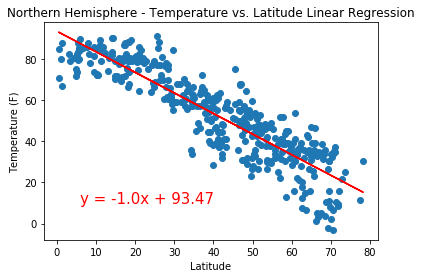

In [126]:

x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere - Temperature vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.53x + 82.22
The r-squared is: 0.6328604322991572
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


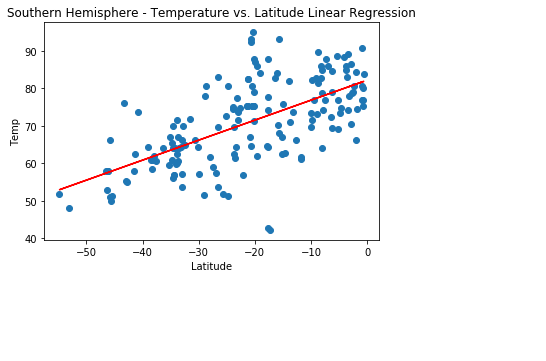

In [128]:

x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title('Southern Hemisphere - Temperature vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.29x + 57.35
The r-squared is: 0.25873122827746986
The regression does not display much of a correlation between the data sets.


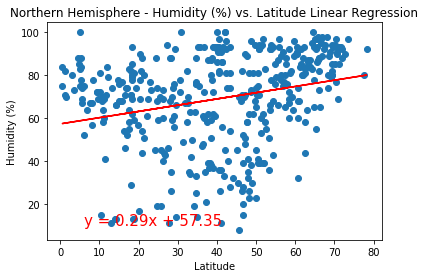

In [129]:

x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.26x + 76.12
The r-squared is: 0.19813143558092322
The regression does not display much of a correlation between the data sets.


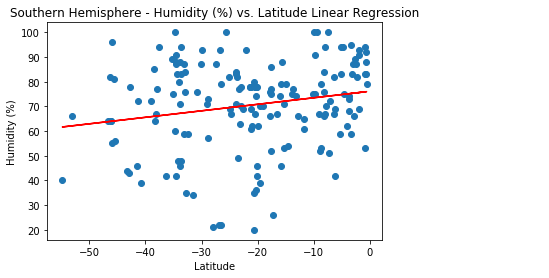

In [131]:

x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.4x + 39.4
The r-squared is: 0.19978885529758245
The regression does not display much of a correlation between the data sets.


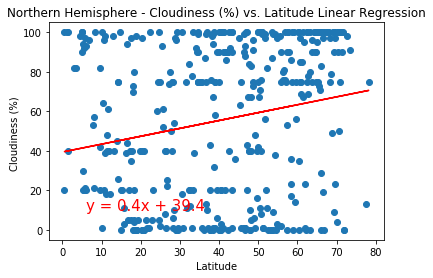

In [134]:
x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.55x + 66.49
The r-squared is: 0.21635609609941953
The regression does not display much of a correlation between the data sets.


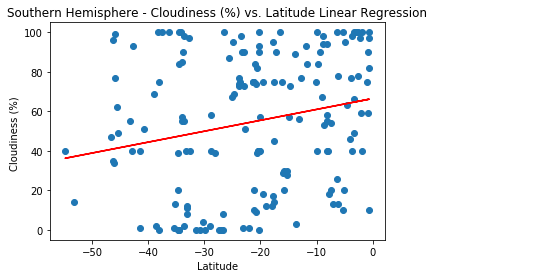

In [140]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.05x + 6.76
The r-squared is: 0.15900843917594695
The regression does not display much of a correlation between the data sets.


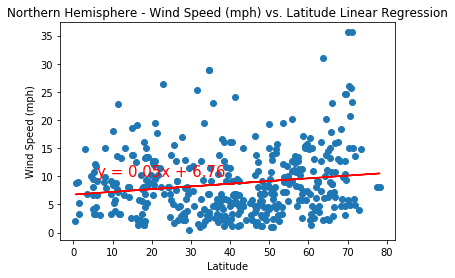

In [138]:

x_values = pd.to_numeric(north_df['Lat']).astype(float)
y_values = pd.to_numeric(north_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.13x + 3.71
The r-squared is: -0.427263146749682
The regression does not display much of a correlation between the data sets.


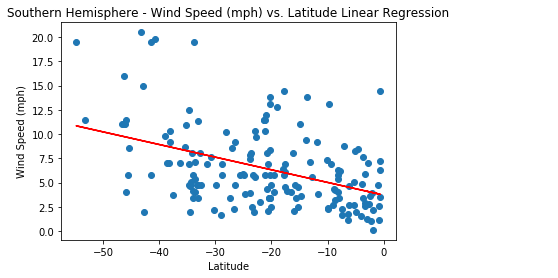

In [139]:
x_values = pd.to_numeric(south_df['Lat']).astype(float)
y_values = pd.to_numeric(south_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.show()